In [1]:
# Import Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re
from io import BytesIO

# Download NLTK stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\st057\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Load Data

df = pd.read_excel('amazon_alexa.xlsx')
df.head()


,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,2018-07-31,Charcoal Fabric,Music,1


In [38]:
df.tail(20)

,rating,date,variation,verified_reviews,feedback,length
3130,5,2018-07-30,Black Dot,Use the product for music and it’s great!,1,41
3131,5,2018-07-30,Black Dot,Easy to set-up and to use.,1,26
3132,5,2018-07-30,Black Dot,It works great!!,1,16
3133,4,2018-07-30,White Dot,I like having more Alexa devices in my house a...,1,102
3134,5,2018-07-30,Black Dot,PHENOMENAL,1,10
3135,5,2018-07-30,White Dot,I loved it does exactly what it says,1,36
3136,4,2018-07-30,Black Dot,I used it to control my smart home devices. Wo...,1,56
3137,5,2018-07-30,Black Dot,Very convenient,1,15
3138,5,2018-07-30,White Dot,Este producto llegó y a la semana se quedó sin...,1,98
3139,5,2018-07-30,White Dot,Easy to set up Ready to use in minutes.,1,39


In [3]:
# Drop rows with missing 'verified_reviews'
df.dropna(inplace=True)

In [4]:

# Create a new column 'length' for length of 'verified_reviews'
df['length'] = df['verified_reviews'].apply(len)

In [5]:
# Check the record at index 10
print(f"'verified_reviews' column value: {df.iloc[10]['verified_reviews']}")
print(f"Length of review : {len(df.iloc[10]['verified_reviews'])}")
print(f"'length' column value : {df.iloc[10]['length']}")

'verified_reviews' column value: I sent it to my 85 year old Dad, and he talks to it constantly.
Length of review : 63
'length' column value : 63


In [6]:
# Count and percentage distribution of ratings
print(f"Rating value count: \n{df['rating'].value_counts()}")
print(f"Rating value count - percentage distribution: \n{round(df['rating'].value_counts()/df.shape[0]*100,2)}")


Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64
Rating value count - percentage distribution: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


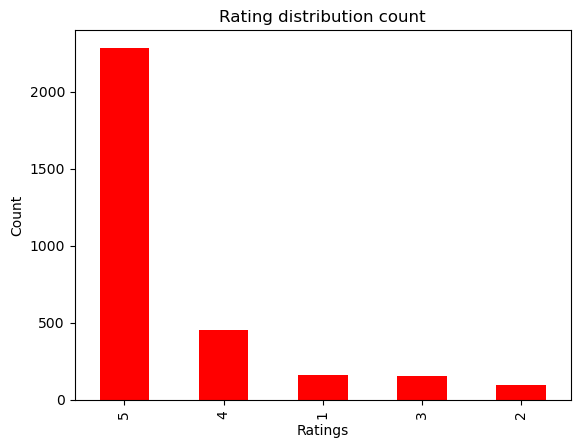

In [7]:
# Bar plot of rating distribution
df['rating'].value_counts().plot.bar(color='red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

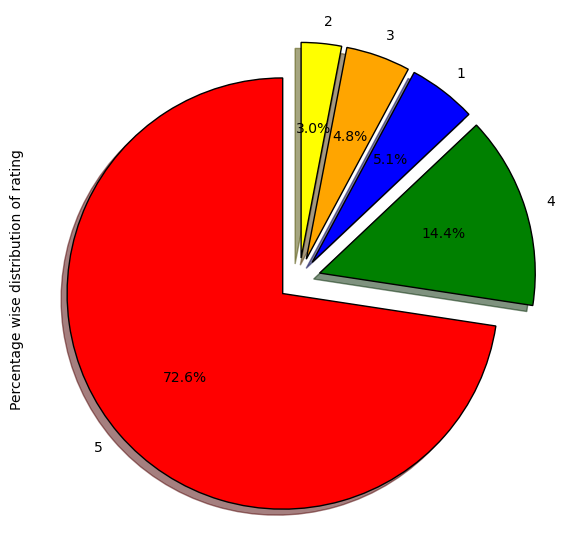

In [8]:
# Pie chart of rating distribution
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','yellow')
wp = {'linewidth':1, "edgecolor":'black'}
tags = df['rating'].value_counts()/df.shape[0]
explode = (0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distribution of rating')
plt.show()

In [9]:
# Count and percentage distribution of feedback
print(f"Feedback value count: \n{df['feedback'].value_counts()}")
print(f"Feedback value count - percentage distribution: \n{round(df['feedback'].value_counts()/df.shape[0]*100,2)}")


Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64
Feedback value count - percentage distribution: 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


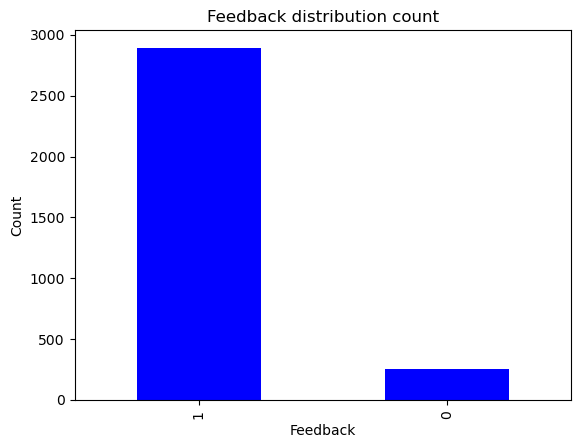

In [10]:
# Bar plot of feedback distribution
df['feedback'].value_counts().plot.bar(color='blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

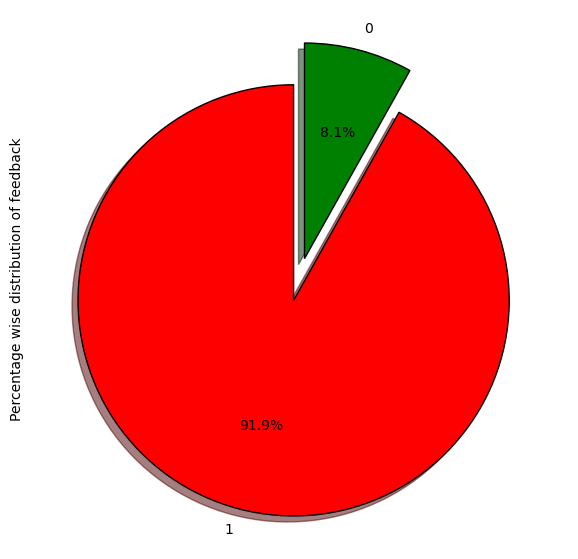

In [11]:
# Pie chart of feedback distribution
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green')
wp = {'linewidth':1, "edgecolor":'black'}
tags = df['feedback'].value_counts()/df.shape[0]
explode = (0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distribution of feedback')
plt.show()

In [12]:
# Count and percentage distribution of variation
print(f"Variation value count: \n{df['variation'].value_counts()}")
print(f"Variation value count - percentage distribution: \n{round(df['variation'].value_counts()/df.shape[0]*100,2)}")

Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64
Variation value count - percentage distribution: 
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84


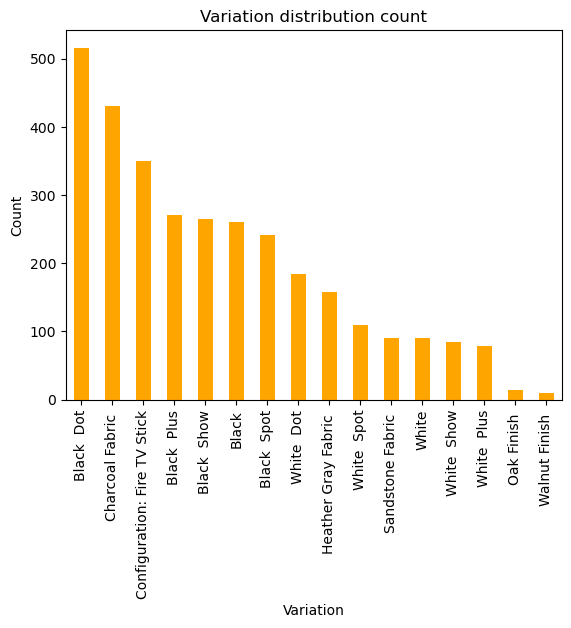

In [13]:
# Bar plot of variation distribution
df['variation'].value_counts().plot.bar(color='orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

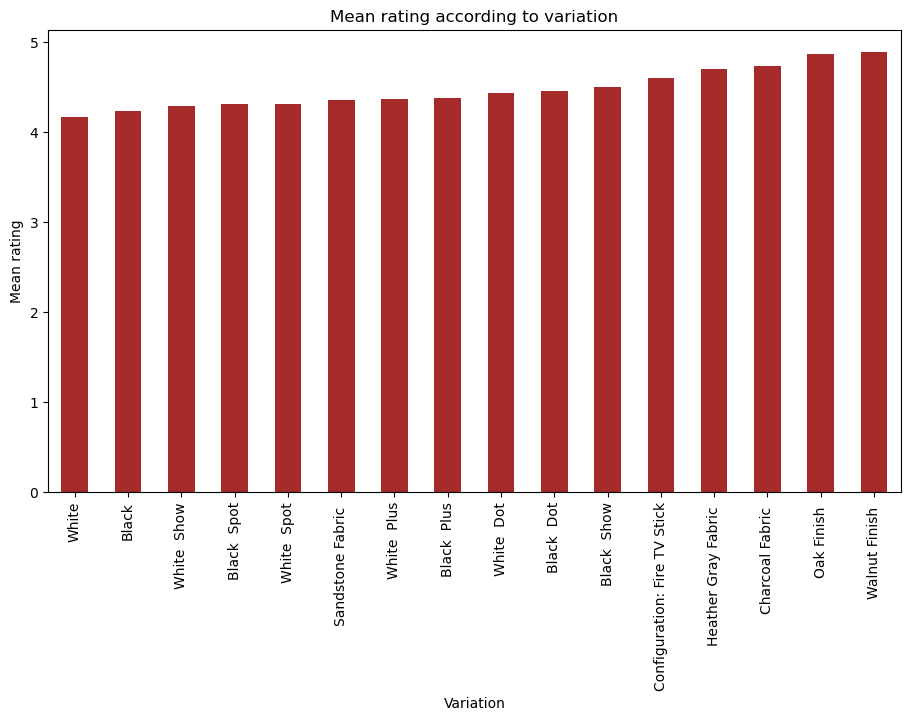

In [14]:
# Mean rating according to variation
df.groupby('variation')['rating'].mean().sort_values().plot.bar(color='brown', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

In [15]:
# Descriptive statistics of review lengths
df['length'].describe()

count    3149.000000
mean      132.090187
std       182.114569
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

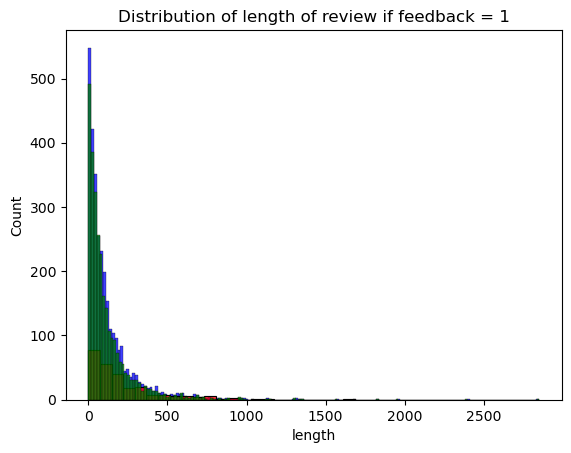

In [16]:
# Histograms of review length
sns.histplot(df['length'], color='blue').set(title='Distribution of length of review')
sns.histplot(df[df['feedback']==0]['length'], color='red').set(title='Distribution of length of review if feedback = 0')
sns.histplot(df[df['feedback']==1]['length'], color='green').set(title='Distribution of length of review if feedback = 1')
plt.show()

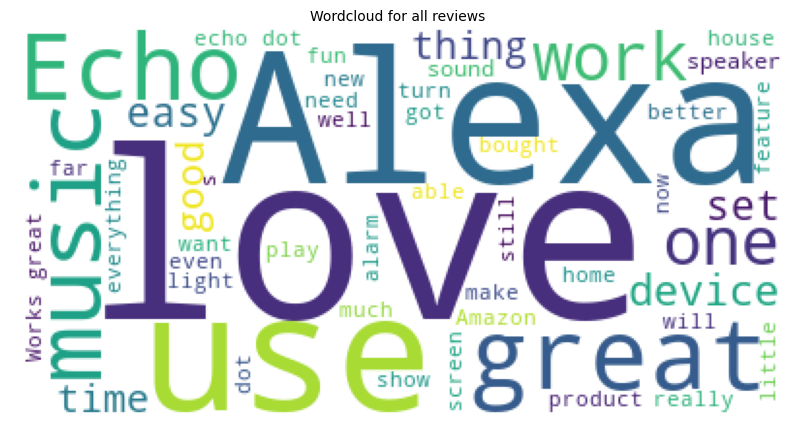

In [17]:
# Word Cloud Analysis

# Generate and plot word cloud for all reviews
reviews = " ".join([review for review in df['verified_reviews']])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()







In [18]:
# Generate and plot word cloud for negative and positive reviews
neg_reviews = " ".join([review for review in df[df['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()
pos_reviews = " ".join([review for review in df[df['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)
unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

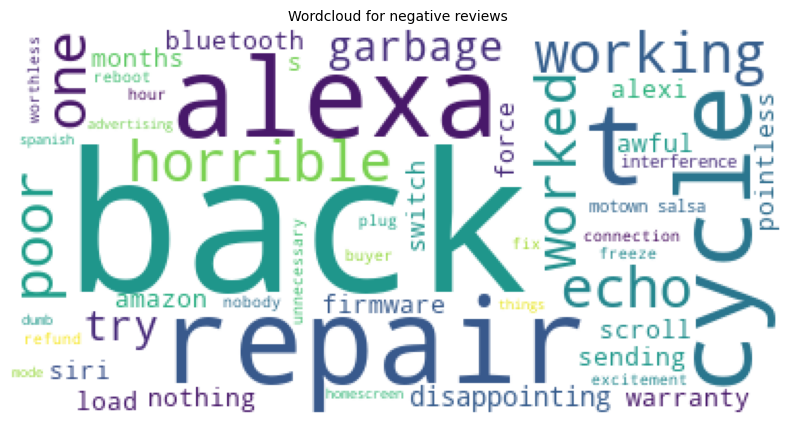

In [19]:
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()


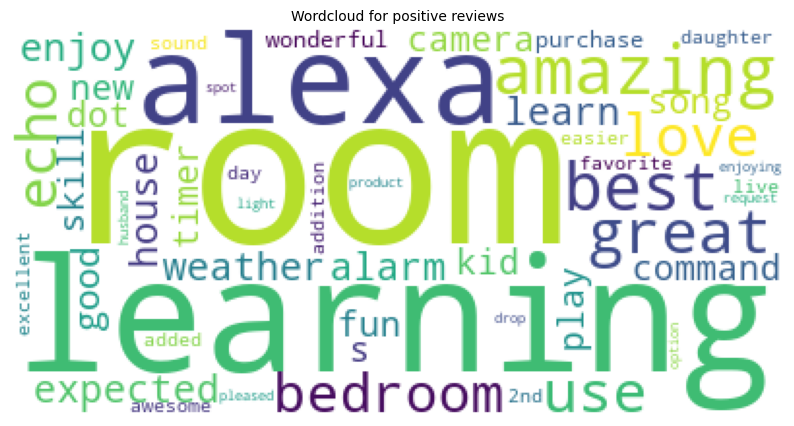

In [20]:
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()


In [21]:
# Preprocessing for Machine Learning

corpus = []
stemmer = PorterStemmer()
for i in range(df.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = ' '.join(review)
    corpus.append(review)



In [22]:

cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()
y = df['feedback'].values


In [23]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


In [24]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


In [25]:
# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the training and testing data
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

# Continue with your model training process

In [26]:
# Model Training and Evaluation

# Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))


Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.9407407407407408


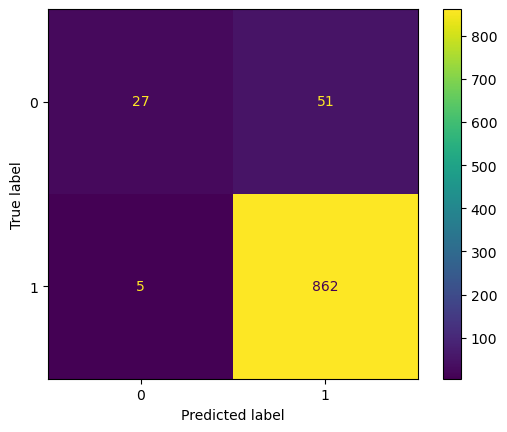

In [27]:
y_preds = model_rf.predict(X_test_scl)
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [28]:
accuracies = cross_val_score(estimator=model_rf, X=X_train_scl, y=y_train, cv=10)
print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9314932126696833
Standard Variance : 0.009797810827226791


In [29]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [30]:
cv_object = StratifiedKFold(n_splits=2)
grid_search = GridSearchCV(estimator=model_rf, param_grid=params, cv=cv_object, verbose=0, return_train_score=True)
grid_search.fit(X_train_scl, y_train.ravel())
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean() * 100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean() * 100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Cross validation mean accuracy on train set : 96.72754083484574
Cross validation mean accuracy on test set : 92.14496370235935
Accuracy score for test set : 0.9407407407407408


Training Accuracy : 0.971415607985481
Testing Accuracy : 0.9417989417989417


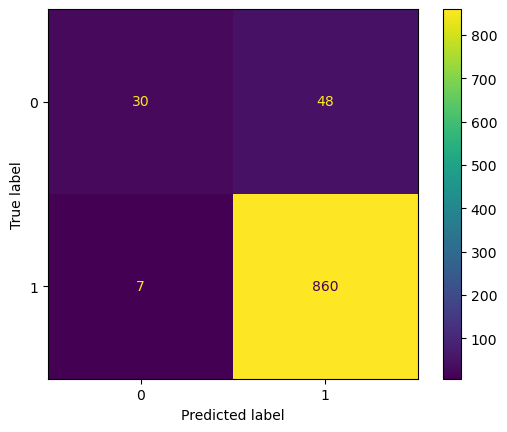

In [31]:
# XGBoost Classifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)
print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

y_preds = model_xgb.predict(X_test_scl)
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()


Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.9206349206349206


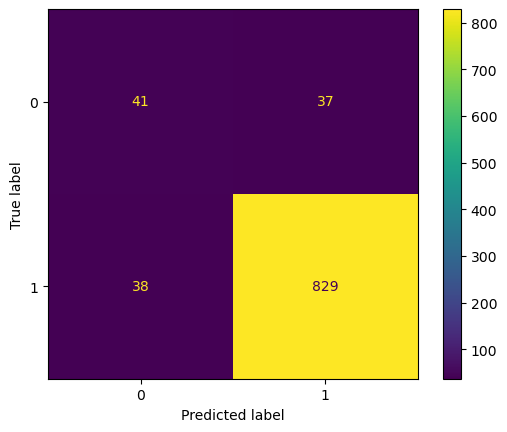

In [32]:
# Decision Tree Classifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)
print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

y_preds = model_dt.predict(X_test_scl)
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_dt.classes_)
cm_display.plot()
plt.show()


In [34]:
import pickle

# Save Count Vectorizer
with open('countVectorizer.pkl', 'wb') as file:
    pickle.dump(cv, file)

# Save Scaler
with open('scalerr.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Save RandomForest Model
with open('model_rf.pkl', 'wb') as file:
    pickle.dump(model_rf, file)

# Save XGBoost Model
with open('model_xgb.pkl', 'wb') as file:
    pickle.dump(model_xgb, file)

# Save Decision Tree Model
with open('model_dt.pkl', 'wb') as file:
    pickle.dump(model_dt, file)


In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler

# Load the models and the vectorizer
cv = pickle.load(open('countVectorizer.pkl', 'rb'))
scaler = pickle.load(open('scalerr.pkl', 'rb'))
model_rf = pickle.load(open('model_rf.pkl', 'rb'))
model_xgb = pickle.load(open('model_xgb.pkl', 'rb'))
model_dt = pickle.load(open('model_dt.pkl', 'rb'))

# Function to predict sentiment
def predict_sentiment(review_text, model_choice):
    if review_text:
        # Preprocess the input text
        review = [review_text]
        X = cv.transform(review).toarray()
        
        # Debugging: print transformed text
        print(f"Transformed Text: {X}")
        
        X_scl = scaler.transform(X)
        
        # Debugging: print scaled features
        print(f"Scaled Features: {X_scl}")

        # Choose the model based on user selection
        if model_choice == 'RandomForest':
            prediction = model_rf.predict(X_scl)
        elif model_choice == 'XGBoost':
            prediction = model_xgb.predict(X_scl)
        elif model_choice == 'DecisionTree':
            prediction = model_dt.predict(X_scl)
        
        # Debugging: print prediction output
        print(f"Prediction Output: {prediction}")

        # Show prediction
        sentiment = 'Positive' if prediction[0] == 1 else


SyntaxError: invalid syntax (1198364127.py, line 41)

In [41]:
import pickle
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler

# Load the models and the vectorizer
cv = pickle.load(open('countVectorizer.pkl', 'rb'))
scaler = pickle.load(open('scalerr.pkl', 'rb'))
model_rf = pickle.load(open('model_rf.pkl', 'rb'))
model_xgb = pickle.load(open('model_xgb.pkl', 'rb'))
model_dt = pickle.load(open('model_dt.pkl', 'rb'))

# Function to predict sentiment
def predict_sentiment(review_text, model_choice):
    if review_text:
        # Preprocess the input text
        review = [review_text]
        X = cv.transform(review).toarray()
        
        # Debugging: print transformed text
        print(f"Transformed Text: {X}")
        
        X_scl = scaler.transform(X)
        
        # Debugging: print scaled features
        print(f"Scaled Features: {X_scl}")

        # Choose the model based on user selection
        if model_choice == 'RandomForest':
            prediction = model_rf.predict(X_scl)
        elif model_choice == 'XGBoost':
            prediction = model_xgb.predict(X_scl)
        elif model_choice == 'DecisionTree':
            prediction = model_dt.predict(X_scl)
        
        # Debugging: print prediction output
        print(f"Prediction Output: {prediction}")

        # Show prediction
        sentiment = 'Positive' if prediction[0] == 1 else 'Negative'
        return sentiment
    else:
        return 'Please provide a valid review text.'

# Test the function with a few examples
test_review = "This product is amazing! I absolutely love it."
print("Test Review:", test_review)
print("RandomForest Prediction:", predict_sentiment(test_review, 'RandomForest'))

test_review = "I hate this product, it is terrible and useless."
print("\nTest Review:", test_review)
print("XGBoost Prediction:", predict_sentiment(test_review, 'XGBoost'))

test_review = "The quality is decent, but the price is too high."
print("\nTest Review:", test_review)
print("DecisionTree Prediction:", predict_sentiment(test_review, 'DecisionTree'))


Test Review: This product is amazing! I absolutely love it.
Transformed Text: [[0 0 0 ... 0 0 0]]
Scaled Features: [[0. 0. 0. ... 0. 0. 0.]]
Prediction Output: [1]
RandomForest Prediction: Positive

Test Review: I hate this product, it is terrible and useless.
Transformed Text: [[0 0 0 ... 0 0 0]]
Scaled Features: [[0. 0. 0. ... 0. 0. 0.]]
Prediction Output: [1]
XGBoost Prediction: Positive

Test Review: The quality is decent, but the price is too high.
Transformed Text: [[0 0 0 ... 0 0 0]]
Scaled Features: [[0. 0. 0. ... 0. 0. 0.]]
Prediction Output: [1]
DecisionTree Prediction: Positive
